### GTFS (General Transit Feed Specification) 
* A standard format for public transportation schedules and associated geographic information. 
* It is defined by the [Google Transit Feed Specification](https://developers.google.com/transit/gtfs/reference/).
* GTFS includes a set of files that describe the routes, stops, and schedules for a transit agency's services, as well as information about fares and geographic information (such as the location of stops and routes).

### Before we start


#### Activate the conda environment
* conda activate myenv (or whatever you named your environment)

#### install the following packages
* pip install gtfs-kit  
(Source: https://pypi.org/project/gtfs-kit/)
* conda install -c conda-forge shapely
* conda install -c conda-forge pandas
* conda install -c conda-forge geopandas

In [1]:
# first load the packages we need
import gtfs_kit as gk
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.simplefilter("ignore", ShapelyDeprecationWarning)

# warnings.filterwarnings("ignore")
# warnings.simplefilter("ignore", ShapelyDeprecationWarning)

In [2]:
# feed contains all the information in the GTFS feed
feed = (gk.read_feed('data/gtfs_data/crimson_ride_sample.zip', dist_units='mi'))

In [3]:
# let's look at the routes and trips
routes = gpd.GeoDataFrame.from_features(feed.routes_to_geojson())
trips = gpd.GeoDataFrame.from_features(feed.trips_to_geojson())
stops = gpd.GeoDataFrame.from_features(feed.stops_to_geojson())

In [4]:
# plot routes to a map
feed.map_stops(feed.stops.stop_id[:])

In [5]:
# plot routes to a map
feed.map_routes(feed.routes.route_id[:],include_stops=True)

In [6]:
# mannually plot it to a map (using maplotlib, geopandas, contextily)

# import contextily as ctx
# # conda install -c conda-forge contextily=1.1.0

# fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(8.7, 8.7)) # set up a blank figure

# ax = routes.plot(alpha=0.5, linewidth=3, color = [f"#{i}" for i in routes["route_color"]], zorder=1, ax=axe) # plot the routes

# ctx.add_basemap(ax, zoom=14, source = ctx.sources.ST_TONER_LITE, alpha=0.5, crs = "EPSG:4326") # add a basemap

# stops.plot(ax=axe,markersize =50,color = "red",zorder=2, alpha=0.5) # plot the stops

# # set up the lon-lat range of the coverage area
# maxlat,maxlon = 33.22934, -87.52
# minlat,minlon = 33.195, -87.55292

# # set the axis limits
# ax.set_xlim(minlon,maxlon)
# ax.set_ylim(minlat,maxlat)

# plt.tight_layout()
# plt.savefig("map.png", dpi=300) # save the figure
# plt.show()

In [7]:
# get the sample trajectory data covered by one bus.
sp = pd.read_json("data/sample_traj.json")

In [8]:
# let's look at the data
sp.head(10)

,id,userId,bus,route,latitude,longitude,speed,course,heading,created,...,point,day,hour,acceleration,mass,a,theta,v,P_w,eta_RB_t
157353,6923106528,240,7027,Hub 1,33.213259,-87.518882,8.120092,305,NaN,2022-04-01 17:08:21,...,NaN,1,17,NaN,15731,NaN,0,3.629903,NaN,0
157368,6923107115,240,7027,Hub 1,33.213334,-87.519101,10.983375,285,NaN,2022-04-01 17:08:26,...,NaN,1,17,0.255993,15731,0.255993,0,4.909868,5653.982207,0
157386,6923107700,240,7027,Hub 1,33.213385,-87.519321,7.829290,299,NaN,2022-04-01 17:08:31,...,NaN,1,17,-0.281992,15731,-0.281992,0,3.499906,-2850.522773,0
157400,6923108467,240,7027,Hub 1,33.213527,-87.519544,12.795297,308,NaN,2022-04-01 17:08:36,...,NaN,1,17,0.369990,15731,0.369990,0,5.719847,7477.368307,0
157419,6923109177,240,7027,Hub 1,33.213644,-87.519761,5.950260,303,NaN,2022-04-01 17:08:42,...,NaN,1,17,-0.509986,15731,-0.509986,0,2.659929,-6455.183429,0
157443,6923110325,240,7027,Hub 1,33.213703,-87.519921,8.120092,291,NaN,2022-04-01 17:08:51,...,NaN,1,17,0.107775,15731,0.107775,0,3.629903,3284.147281,0
157470,6923111582,240,7027,Hub 1,33.213745,-87.520133,1.409272,277,NaN,2022-04-01 17:09:01,...,NaN,1,17,-0.299992,15731,-0.299992,0,0.629983,-3175.109677,0
157496,6923112757,240,7027,Hub 1,33.213746,-87.520135,0.000000,278,NaN,2022-04-01 17:09:11,...,NaN,1,17,-0.062998,15731,-0.062998,0,0.000000,551.649828,0
157524,6923113988,240,7027,Hub 1,33.213744,-87.520135,0.492127,278,NaN,2022-04-01 17:09:21,...,NaN,1,17,0.021999,15731,0.021999,0,0.219994,1888.918162,0
157544,6923114901,240,7027,Hub 1,33.213928,-87.520261,12.728189,359,NaN,2022-04-01 17:09:29,...,NaN,1,17,0.683732,15731,0.683732,0,5.689847,12411.640552,0


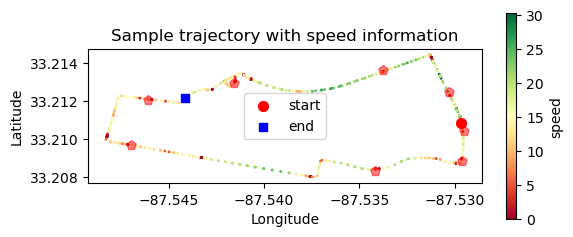

In [11]:
# viz the route, together with the stops and the trajectory

fig, ax = plt.subplots(figsize=(6,2.5))

sp.plot(x="correctedLongitude",y="correctedLatitude",kind="scatter",s=1.0, c="speed", cmap="RdYlGn", ax=ax) # one driver for one day.
sp.head(1).plot(x="correctedLongitude",y="correctedLatitude",kind="scatter", label="start", ax=ax, marker="o", color="r",s=50) # one driver for one day.
sp.tail(1).plot(x="correctedLongitude",y="correctedLatitude",kind="scatter", label="end", ax=ax, marker="s", color="b",s=40) # one driver for one day.

stops.plot(ax=ax,markersize =50,color = "red",zorder=2, alpha=0.5, marker ="p") # plot the stops


ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sample trajectory with speed information")

plt.locator_params(axis='both', nbins=5)
plt.savefig("figures/trajectory.png", dpi=300) # save the figure
plt.tight_layout()

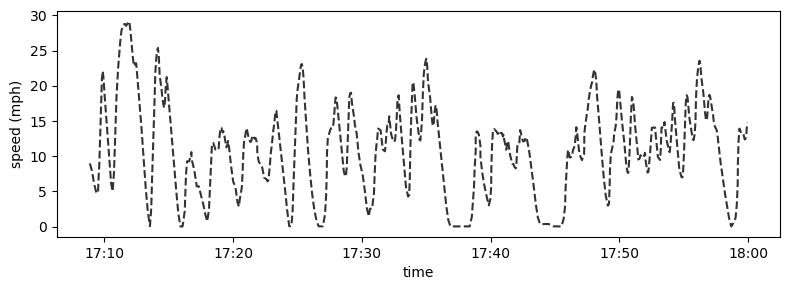

In [12]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(sp["datetime"],sp["speed"].rolling(6).mean(), color="0.2", linestyle="--")

ax.set_ylabel("speed (mph)")
ax.set_xlabel("time")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.savefig("figures/sample_speed.png", dpi=300)

In [13]:
sp.sort_values(by="datetime",inplace=True)
sp["acceleration"] = (sp["speed"].diff()/2.237)/sp["datetime"].diff().dt.total_seconds()

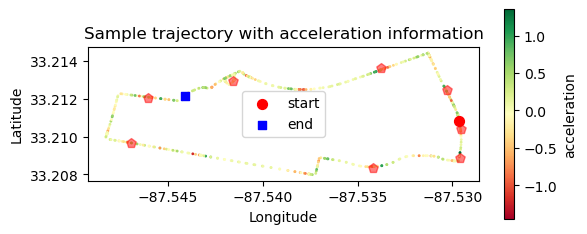

In [14]:
# viz the route, together with the stops and the trajectory

fig, ax = plt.subplots(figsize=(6,2.5))

sp.plot(x="correctedLongitude",y="correctedLatitude",kind="scatter",s=1.0, c="acceleration", cmap="RdYlGn", ax=ax) # one driver for one day.
sp.head(1).plot(x="correctedLongitude",y="correctedLatitude",kind="scatter", label="start", ax=ax, marker="o", color="r",s=50) # one driver for one day.
sp.tail(1).plot(x="correctedLongitude",y="correctedLatitude",kind="scatter", label="end", ax=ax, marker="s", color="b",s=40) # one driver for one day.

stops.plot(ax=ax,markersize =50,color = "red",zorder=2, alpha=0.5, marker ="p") # plot the stops


ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sample trajectory with acceleration information")

plt.locator_params(axis='both', nbins=5)
plt.tight_layout()
plt.savefig("figures/trajectory_acceleration.png", dpi=300) # save the figure

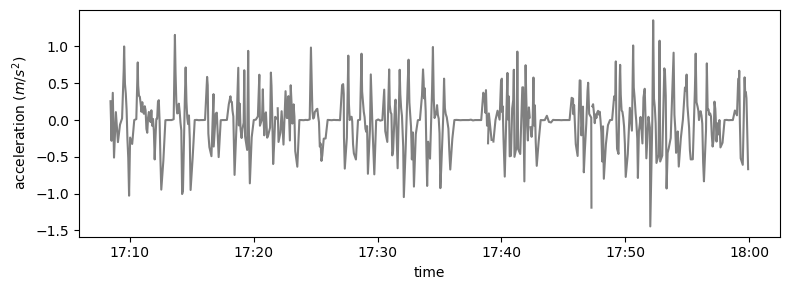

In [15]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(sp["datetime"],sp["acceleration"], color="0.5", linestyle="-")

ax.set_xlabel("time")
ax.set_ylabel("acceleration ($m/s^2$)") 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.savefig("figures/sample_acceleration.png", dpi=300)

### Calculate Energy Comsumption along the trajectory (todo)

In [39]:
from get_consumption import get_traction_power

In [40]:
# load elevation related data

# long-lat range of the coverage area
maxlat,maxlon = 33.22934, -87.50141
minlat,minlon = 33.18679, -87.55292

# a matrix of elevation data
ele_mat = np.load("data/elevation_mat.npy")

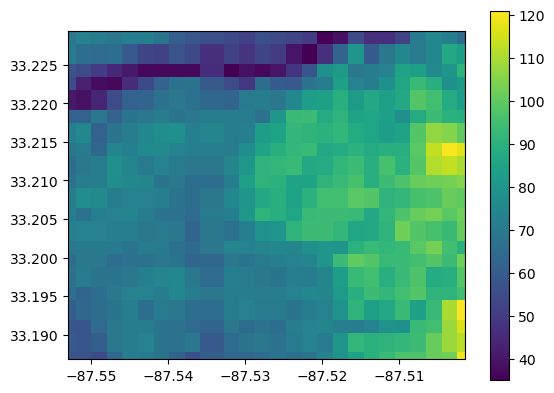

In [41]:
# then take a look
plt.imshow(ele_mat[::-1],cmap="viridis",extent=[minlon,maxlon,minlat,maxlat])
plt.colorbar()